In [1]:
import pandas as pd

In [7]:
# Reducing the size of the datatypes since the no.of columns rows are very much
def reduce_mem(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type == 'float64':
            df[col] = df[col].astype('float32')

        elif col_type == 'int64':
            df[col] = df[col].astype('int32')

        elif col_type == 'object':
            df[col] = df[col].astype('category')

    return df


In [8]:
tr  = reduce_mem(pd.read_csv("data/raw/train_transaction.csv"))
idn = reduce_mem(pd.read_csv("data/raw/train_identity.csv"))

# merging the transactions and identity on Transaction ID
train = reduce_mem(tr.merge(idn, on="TransactionID", how="left"))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: category(31), float32(399), int32(4)
memory usage: 927.1 MB


In [12]:
# COnverting the TransactionDT to datetime

START_DATE = "2017-12-01"
train["dt"] = pd.to_datetime(train["TransactionDT"], unit='s', origin=START_DATE)
train = train.sort_values("dt")

In [14]:
train[["TransactionDT","dt"]].head()


,TransactionDT,dt
0,86400,2017-12-02 00:00:00
1,86401,2017-12-02 00:00:01
2,86469,2017-12-02 00:01:09
3,86499,2017-12-02 00:01:39
4,86506,2017-12-02 00:01:46


In [16]:
# saving the merged dataset as parquet so next time it can be loaded directly
train.to_parquet("data/processed/train_merged.parquet")

In [17]:
train.isFraud.value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

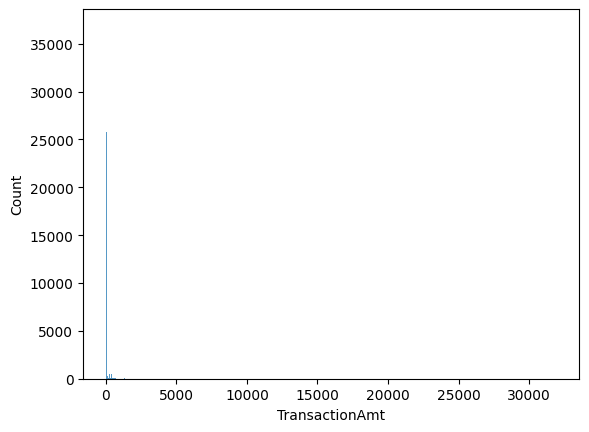

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['TransactionAmt'])
plt.show()

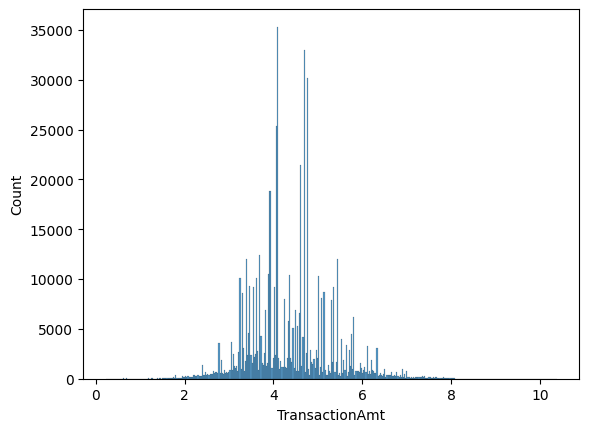

In [20]:
import numpy as np
sns.histplot(np.log1p(train['TransactionAmt']))
plt.show()


In [21]:
train['TransactionAmt'].describe()
train['TransactionAmt'].skew()


np.float32(14.374488)